# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


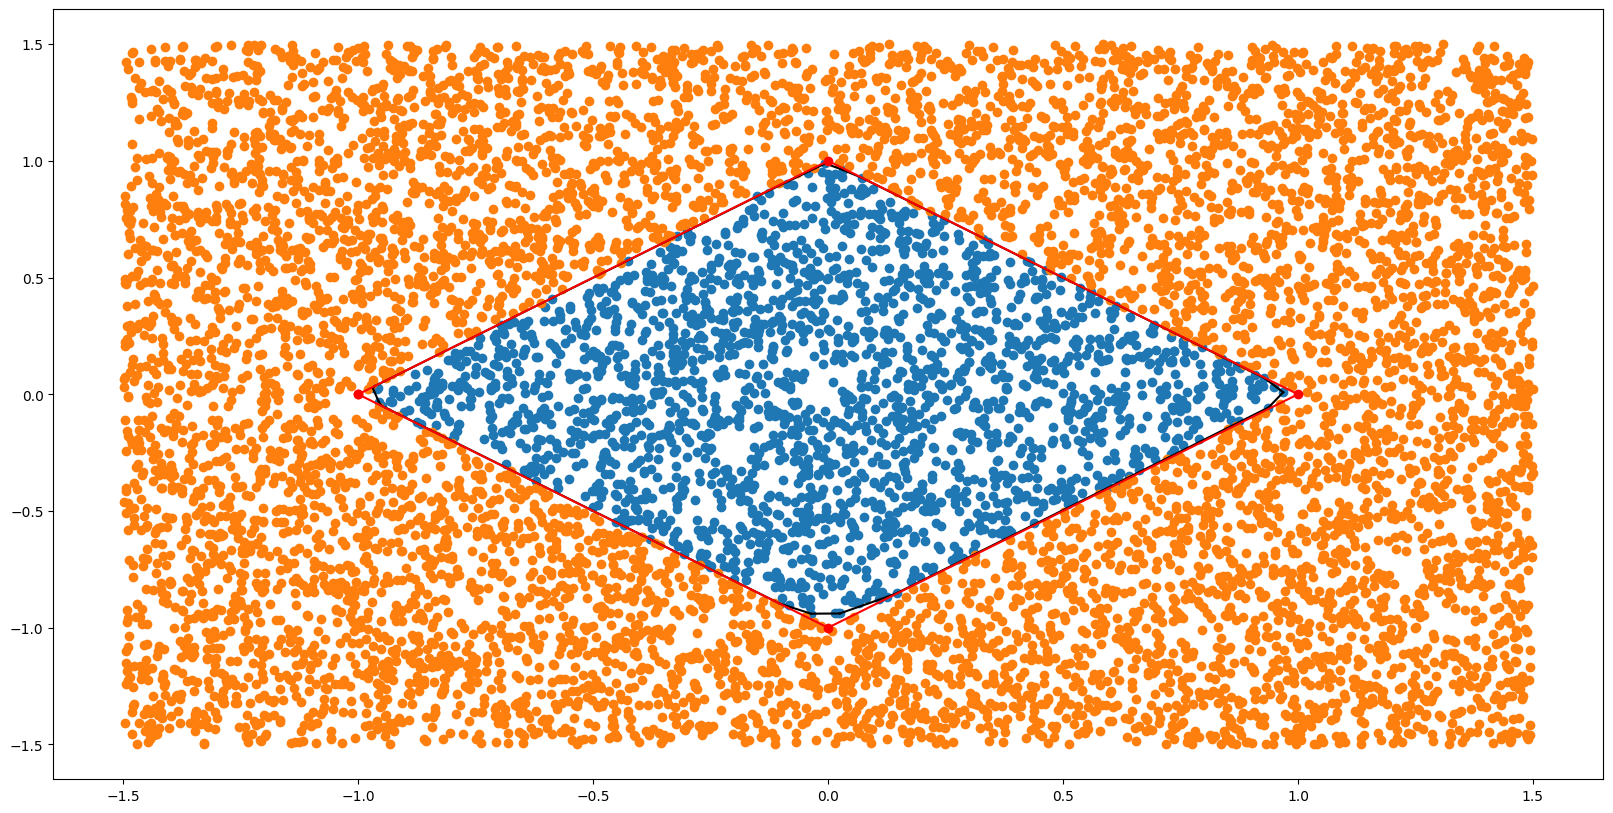

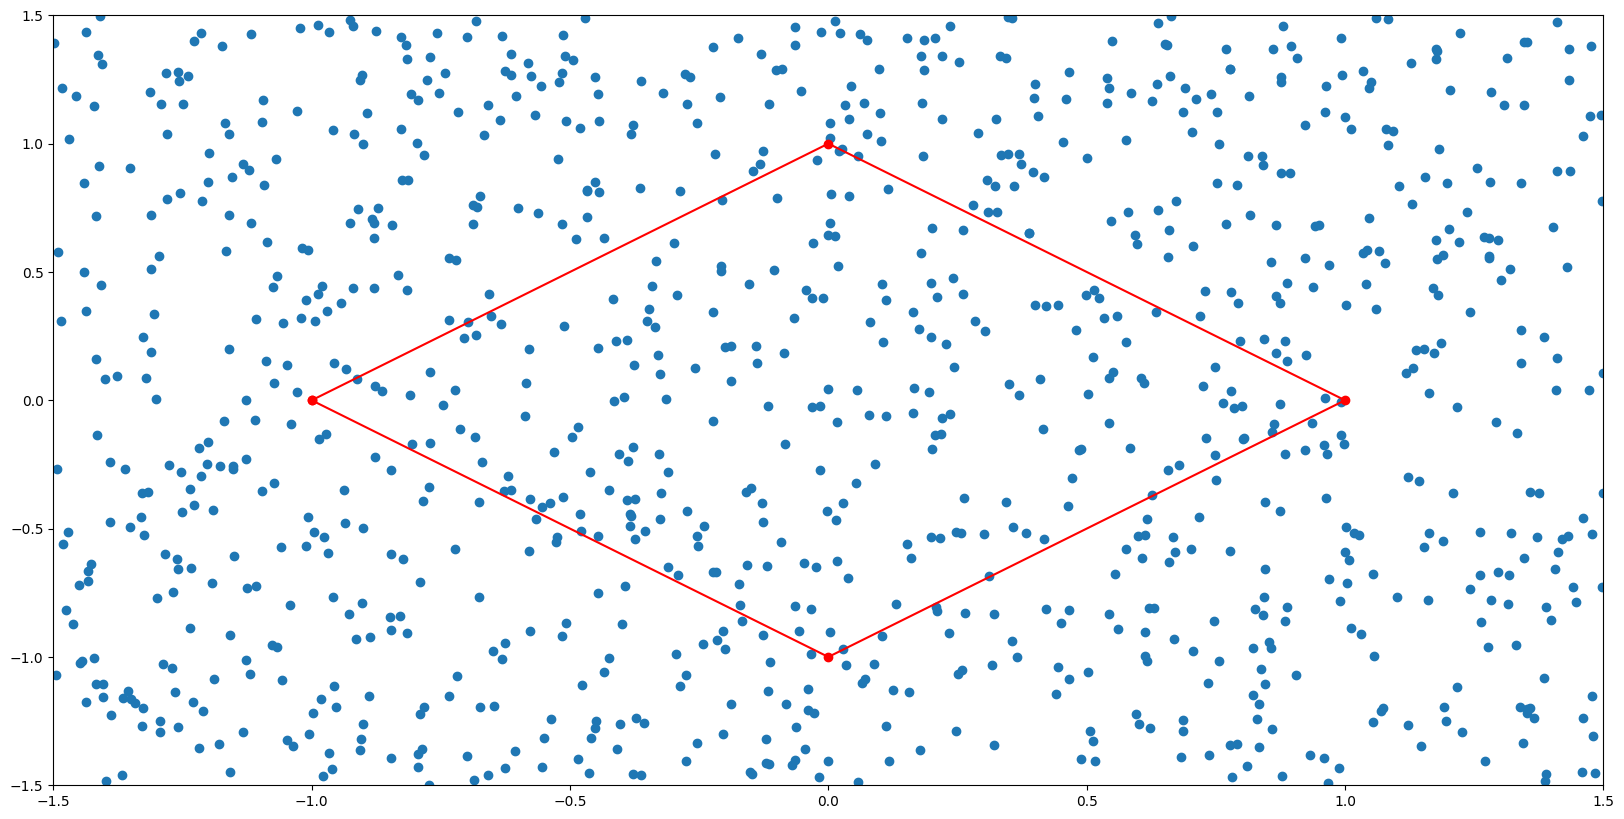

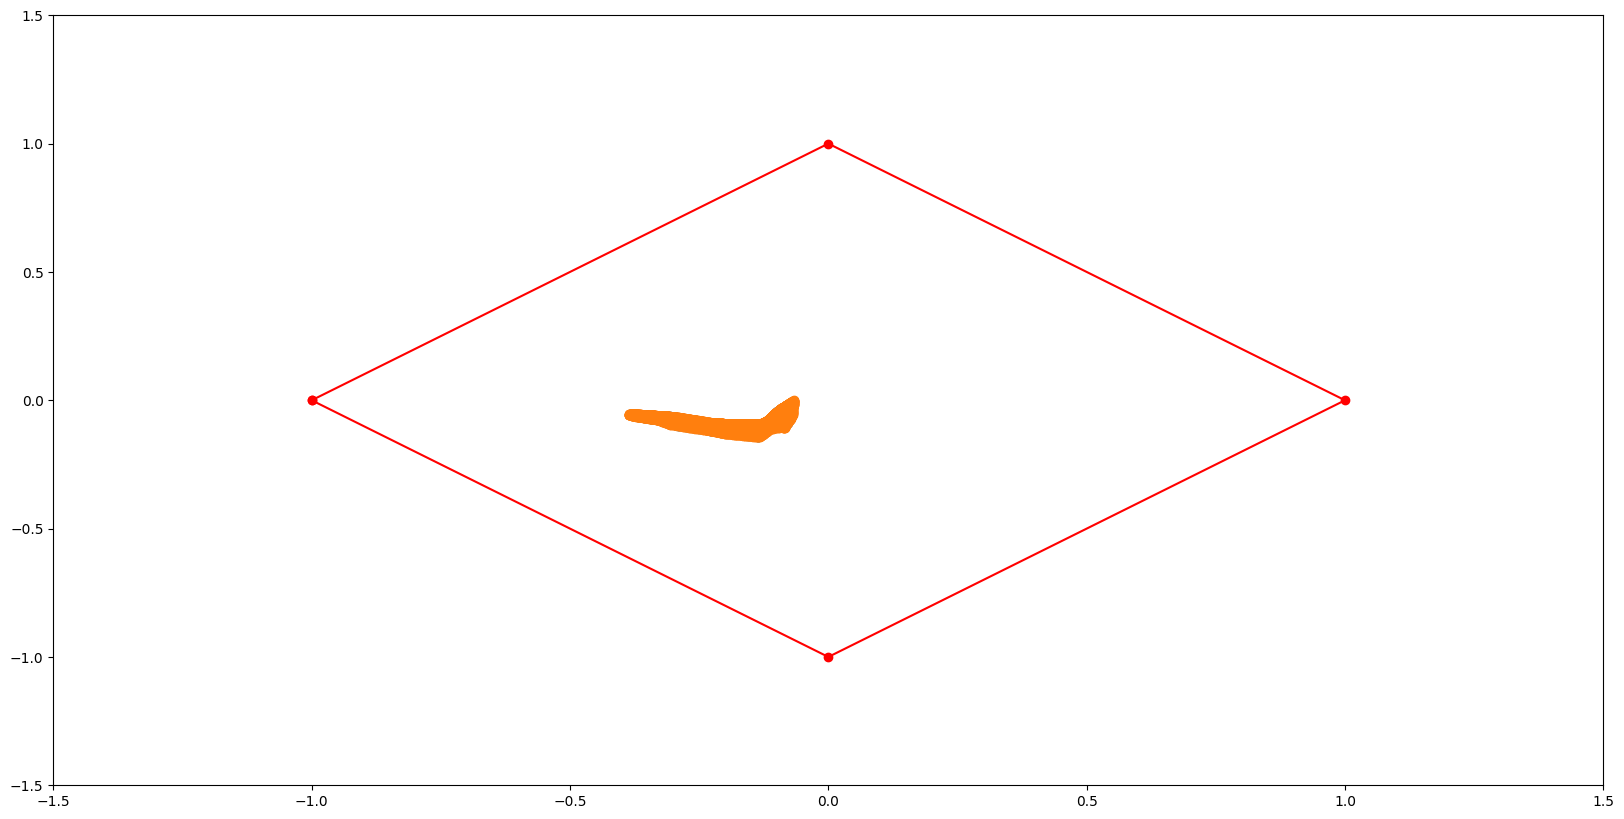

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 1.2509472206211554
batch = 100, mean loss = 1.4067045478276758
batch = 200, mean loss = 1.3759497548095254
batch = 300, mean loss = 1.350559600904455
batch = 400, mean loss = 1.31435228054297
batch = 500, mean loss = 1.2815940310367828
batch = 600, mean loss = 1.2437495148227375
batch = 700, mean loss = 1.214130900876854
batch = 800, mean loss = 1.1828256233487693
batch = 900, mean loss = 1.1526991181530726
batch = 1000, mean loss = 1.1220648766990422
batch = 1100, mean loss = 1.0946197574711098
batch = 1200, mean loss = 1.0660273590586624
batch = 1300, mean loss = 1.042300860798483
batch = 1400, mean loss = 1.01628699299158
batch = 1500, mean loss = 0.9934303586262607
batch = 1600, mean loss = 0.9729453302915357
batch = 1700, mean loss = 0.9513110239288267
batch = 1800, mean loss = 0.9325965349868612
batch = 1900, mean loss = 0.9154906338442846
batch = 2000, mean loss = 0.8995882803158298
batch = 2100, mean loss = 0.8806075540178704
batch = 2200,

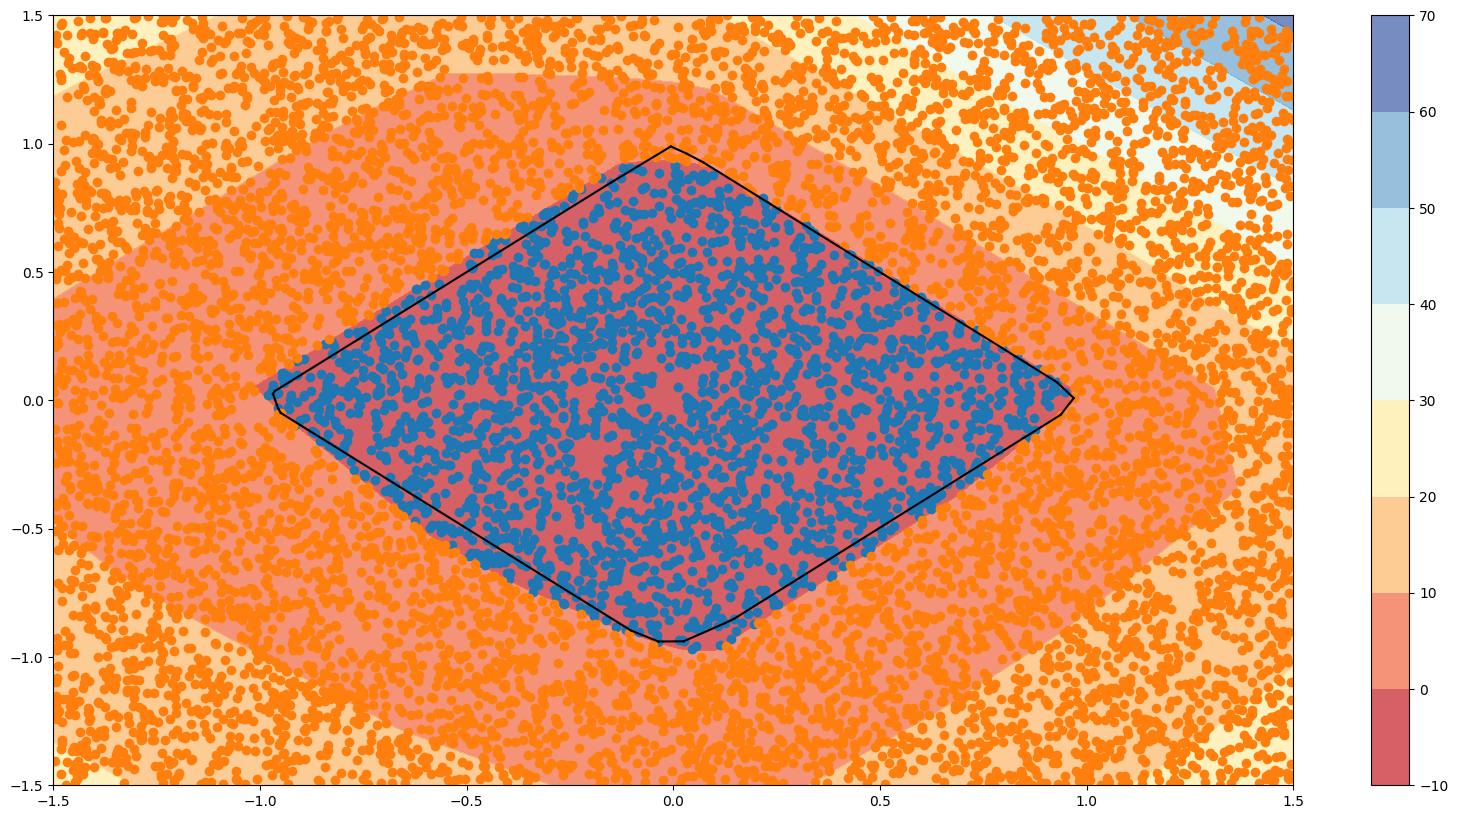

In [6]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 3.759368326171899, l_pos = 0.01725810659467439, l_neg = 3.717823447790862, l_gen = 0.024286771786362675
batch = 100, mean loss = 3.0287035278545735, l_pos = 0.10101899659717814, l_neg = 2.758253821933391, l_gen = 0.16943070932400386
batch = 200, mean loss = 2.0662687215055437, l_pos = 0.09635668926287468, l_neg = 1.4117332498398136, l_gen = 0.5581787824028539
batch = 300, mean loss = 1.7470874523377238, l_pos = 0.09901202419743786, l_neg = 0.9533511079510706, l_gen = 0.6947243201892147
batch = 400, mean loss = 1.5814683585549925, l_pos = 0.09479396080403964, l_neg = 0.722663392782307, l_gen = 0.7640110049686436
batch = 500, mean loss = 1.481292386236791, l_pos = 0.09162977656672697, l_neg = 0.5834978087259496, l_gen = 0.8061648009441136
batch = 600, mean loss = 1.4155605218732905, l_pos = 0.09066210709845157, l_neg = 0.4898691344233066, l_gen = 0.8350292803515318
batch = 700, mean loss = 1.3650285742109007, l_pos = 0.08644085039891587, l_neg = 0.4

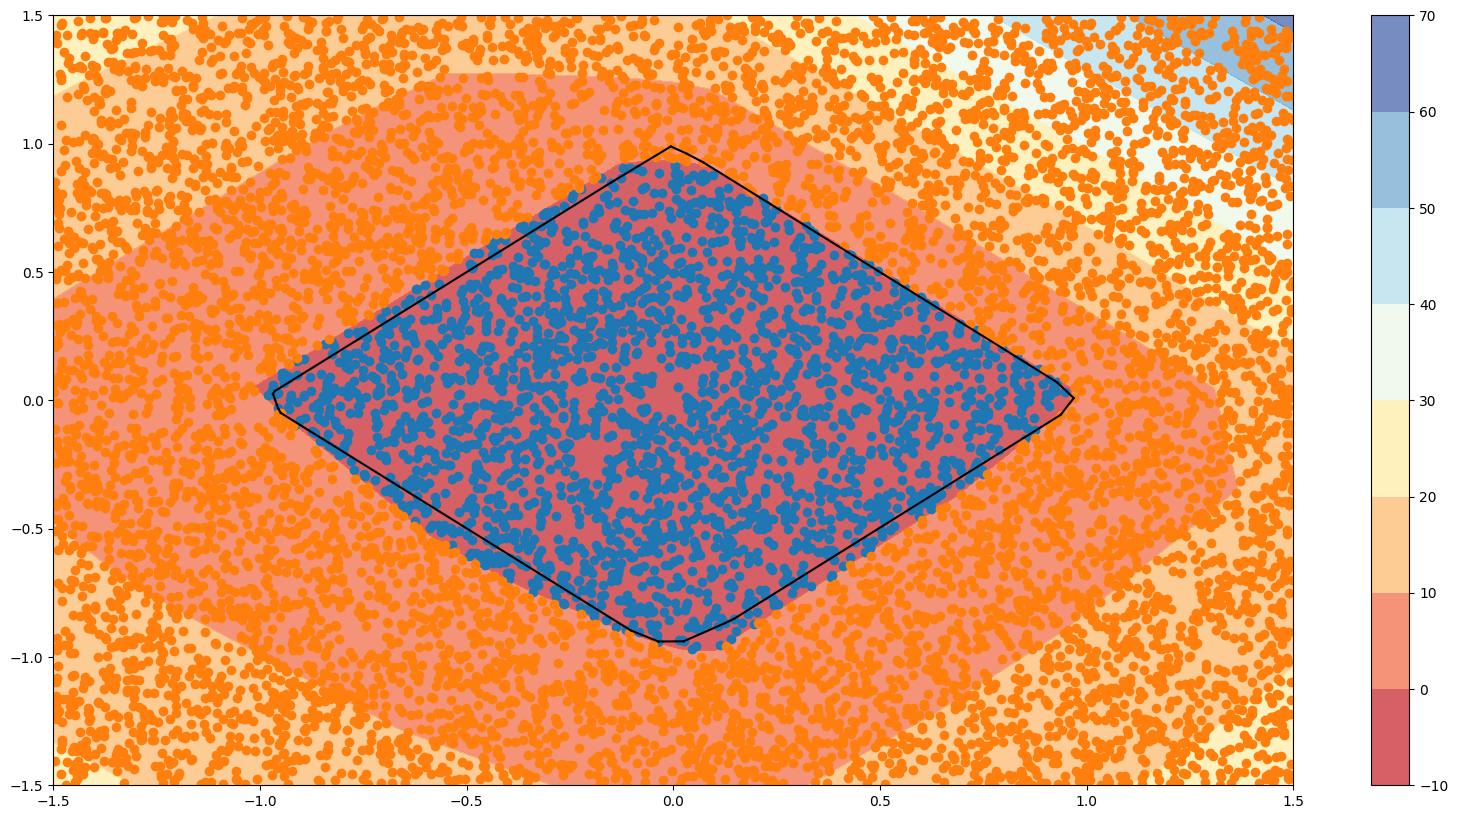

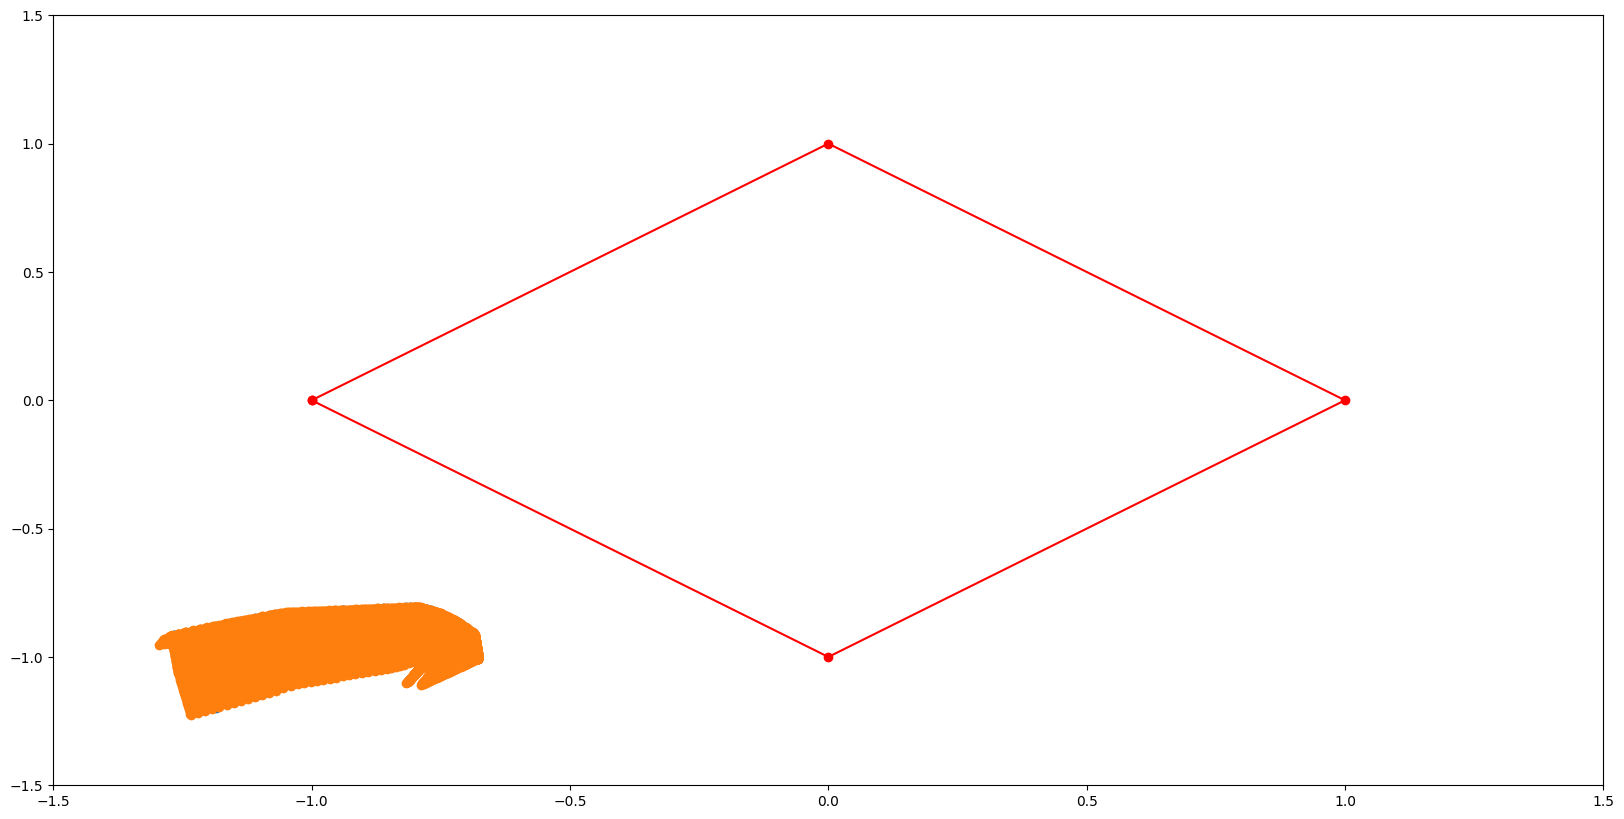

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()